# Predicting Absenteeism in the workplace

### Definition:

Employee Absenteeism in it’s simplest definition refers to a frequent lack of attendance at work. The National Institute for Occupational Safety and Health (NIOSH) defines absenteeism in the work place as time taken off work due to illness or other reasons such as child care, transportation issues, etc. *(Absenteeism in the Workplace 2020).* The U.S. Department of Labor (DOL) defines absenteeism as *“instances when persons who usually work 35 or more hours per week (full time) worked less than 35 hours during the reference week for one of the following reasons: own illness, injury, or medical problems; child care problems; other family or personal obligations; civic or military duty; and maternity or paternity leave” (Absences from work of employed full-time wage and salary workers by occupation and industry 2020).* However, instances where work is missed due to vacation, personal time off, holiday, labor dispute, and other related reasons don’t count as employee absenteeism. 

### Case for this project:

For the year 2019, the U.S. Department of Labor (DOL) estimated that on average, about 2.8 percent of full time employees were absent on any given day leading to an average loss worktime rate (hours absent as a percent of hours usually worked) of about 1.4 percent. The impact of absenteeism is even more severe when work hours lost lead to decreased productivity, morale and temporary labor costs. Many employers dismiss employee absenteeism as a negligeable cost of doing business but the reality is that employee absenteeism is detrimental to most organizations. According to the Centers for Disease Control (CDC), productivity losses from missed work cost employers about 225.8 billion USD, or an average of $1,685 per employee, each year *(Workplace Health Promotion, 2020).*

In 2014, the Society for Human Resource Management (SHRM) in collaboration with and commissioned by Kronos, Incorporated, conducted a study that surveyed 733 SHRM members, Kronos customers and Kronos prospects on the impact of employee Absences in the U.S. According to the research study, the following were recorded as direct costs of absenteeism as a percentage of payroll; All paid time off: 8.1%, Overtime costs: 5.7%, Cost of replacement workers: 1.6%, All direct costs: 15.4%.

Employee absenteeism also has direct impacts on productivity. According to the study, 75% of respondents perceived that employee absences have a moderate to large impact on productivity and revenue. 6.7% of total cost of productivity loss as a percentage of payroll was attributed to unplanned absence, 5.5% was attributed to planned absence, and 6.4% was attributed to extended absence *(The Total Financial Impact of Employee Absences - Executive Report for United States, 2014).* 

It should be noted that employee absenteeism also has a negative effect on workforce morale. According to the study co-workers reported feeling more stressed when their colleagues were absent from work, especially when those absences were unplanned. About 69% of the respondents indicated that unplanned absences add to their workload, 61% reported that employee absences increase stress and 48% reported that unplanned absences hurt morale. 

Although employee absenteeism poses a significant problem for most employers. Barmby, Orme, & Treble in their study, *Worker Absenteeism: An Analysis Using Microdata*, estimate that extended studies of employee absenteeism by economists and HR professionals are few and far between despite the fact that there’s a well understood model of time allocation and labor supply and the data on absenteeism are generally not difficult to come by *(Barmby, Orme, & Treble, 1991)*.

The goal of this study is to examine several factors that contribute to absenteeism at work and find a possible correlation between these factors and work hours lost. If employers can identify factors that have a significant impact on the rate of absenteeism, they can take a proactive approach to address those factors thereby improving morale and productivity, reducing costs associated with absenteeism and maintaining a healthy work environment. 

>In this project, I will analyse a dataset for absenteeism at work from July 2007 to July 2010 at a corrier company in Brazil. I will use graphs to visualize the data and a linear regression model to view what factors had the most and least effect on employee absenteeism.  

**Most notable causes of Absenteeism:**

**Bibiography**

> Absenteeism in the Workplace. (2020, September 24). Retrieved October 10, 2020, from https://www.cdc.gov/niosh/topics/absences/default.html

> Barmby, T. A., Orme, C. D., & Treble, J. G. (1991). Worker Absenteeism: An Analysis Using Microdata. The Economic Journal, 101(405), 214. doi:10.2307/2233813

> Absences from work of employed full-time wage and salary workers by occupation and industry. (2020, January 22). Retrieved October 10, 2020, from https://www.bls.gov/cps/cpsaat47.htm

> Workplace Health Promotion. (2020, March 10). Retrieved October 10, 2020, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/workplace-health.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fchronicdisease%2Fresources%2Fpublications%2Faag%2Fworkplace-health.htm

> The Total Financial Impact of Employee Absences - Executive Report for United States. (2014, October). Retrieved October 10, 2020, from https://www.kronos.com/resource/download/10866



In [1]:
# importing libraries needed to read csv dataset and run plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pip install docx2txt library to read data desc docx
import docx2txt

# view data description
data_desc = docx2txt.process("Absenteeism.docx")
print(data_desc)

Dataset Name: Absenteeism at work 

Abstract: 

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. Absences were recorded for 36 distinct employees over the observed time period.

Source:

Creators, original owner, and donors: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3).

Attribute information

Individual Identification (ID)  Deleted from data set

Reason (Reason for absence)   Categorical

Reason_C (reason for absence - converted)

1 = Justified reason

0 = Unjustified reason

Month  Categorical 

Day  Categorical

Season  Categorical

Converted to binary variables:

Summer (0, 1)  0 = Not summer, 1 = Summer

Fall (0, 1)

Winter (0, 1)

Spring (0, 1)

Trans expense (Transportation expense measured in BRL)  Numerical

DFRW (Distance from Residence to work measured in km)  Numerical 

ST (service time, or length of employment measured in years)  Numerical

Age  Numerical

WLA (Workload

In [3]:
# import/read dataset
data = pd.read_csv("Absenteeism_at_work.csv")

#choose columns to be converted to indicator (dummy) variables (variables with values, 0 or 1)
headings = ["Season","Education"]

# Create a dictionary with the set of possible responses for each heading in the heading list
indicator_responses ={heading :sorted(list(set(data[heading]))) for heading in headings}

# cycle through the heading and possible responses
for heading, responses in indicator_responses.items():
    
# for each possible response, create a new column then convert indicator variables to binary variables (0,1)
    for response in responses:
        
# make all values in that column 0 by default        
        data[response] = 0
    
# identify the subset of data where the data in the row matches response
# make values in that column 1 if their response matches response in the original column of data
        data[response][data[heading]==response] = 1

C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#  Now let's get some meta data
data.shape

(737, 27)

>We see that the dataset has 27 columns and 737 rows. In other words, it has 27 attributes and a tototal of 737 records. Note that the actual number of columns is 19. The extra columns were created after the fact to hold indicator (dummy) variables. 

In [5]:
# Now, let's view the first 3 records of the dataset. 
# The purpose is to take a quick peak at the dataset to understand it's attributes 
data.head(3)

,Reason,Reason_C,Month,Day,Season,Trans expense,DFRW,ST,Age,WLA,...,BMI,AT,Fall,Spring,Summer,Winter,graduate,high school,master/PhD,postgraduate
0,Patient Follow-up,1,Jul,Mon,Summer,235,11,14,37,239554,...,29,8,0,0,1,0,0,0,1,0
1,Unjustified Absence,0,Jul,Tue,Summer,118,13,18,50,239554,...,31,0,0,0,1,0,0,1,0,0
2,Medical Consultation,1,Aug,Thur,Summer,235,11,14,37,205917,...,29,4,0,0,1,0,0,0,0,1


In [6]:
# Let's view the first 5 rows of only the actual variables (not including dummy variables)
# select/assign list of columns whose records we want to view to a list variable, let's call it cols
cols = ["Reason","Month", "Day", "Season", "Trans expense", "DFRW", "ST", "Age", "WLA", "Education", "Children", "Weight", "Height", "BMI", "AT"]

# pass list variable (cols) to the indexing operator
data_short = data[cols]

# view first 10 records of selected columns
data_short.head(10)

,Reason,Month,Day,Season,Trans expense,DFRW,ST,Age,WLA,Education,Children,Weight,Height,BMI,AT
0,Patient Follow-up,Jul,Mon,Summer,235,11,14,37,239554,master/PhD,1,88,172,29,8
1,Unjustified Absence,Jul,Tue,Summer,118,13,18,50,239554,high school,1,98,178,31,0
2,Medical Consultation,Aug,Thur,Summer,235,11,14,37,205917,postgraduate,1,88,172,29,4
3,Unjustified Absence,Dec,Wed,Spring,235,11,14,37,261306,postgraduate,1,88,172,29,8
4,Disease,Apr,Fri,Winter,235,11,14,37,326452,postgraduate,1,88,172,29,3
5,Disease,June,Fri,Winter,235,11,14,37,377550,postgraduate,1,88,172,29,16
6,Medical Consultation,Aug,Tue,Summer,235,11,14,37,265615,postgraduate,1,88,172,29,1
7,"Injury, poisoning and certain other consequenc...",Aug,Thur,Summer,235,11,14,37,265615,postgraduate,1,88,172,29,8
8,Unjustified Absence,Oct,Mon,Spring,235,11,14,37,265017,postgraduate,1,88,172,29,4
9,"Symptoms, signs and abnormal clinical and labo...",Nov,Wed,Spring,235,11,14,37,284031,postgraduate,1,88,172,29,1


In [7]:
#print(dataset.describe(percentiles=None, include=None, exclude=None))

# view summary statistics of one particular attribute in the dataset. 
# In this example, we'll take a look at the Seasons attribute
#data.Season.describe()

# view summary data of dataset (exluding dummy columns with dummy variables)
round(data_short.describe(),1)

,Trans expense,DFRW,ST,Age,WLA,Children,Weight,Height,BMI,AT
count,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0
mean,221.5,29.6,12.5,36.4,271491.3,1.0,79.0,172.1,26.7,7.0
std,67.0,14.8,4.4,6.5,39137.6,1.1,12.9,6.0,4.3,13.4
min,118.0,5.0,1.0,27.0,205917.0,0.0,56.0,163.0,19.0,0.0
25%,179.0,16.0,9.0,31.0,244387.0,0.0,69.0,169.0,24.0,2.0
50%,225.0,26.0,13.0,37.0,264249.0,1.0,83.0,170.0,25.0,3.0
75%,260.0,50.0,16.0,40.0,294217.0,2.0,89.0,172.0,31.0,8.0
max,388.0,52.0,29.0,58.0,378884.0,4.0,108.0,196.0,38.0,120.0


> From the above table, out of 36 the employees who absences were recorded, we that the averate cost of transportation from home to work is 221.5 BRL and employees travel an average of 29.6 km to work every day. The averate age of workers who reported absences is 36. Also, a daily everage of 7 hours of absence were recorded.

In [8]:
# view summary of columns that only contain number values
# dataset.describe(exclude=[np.object])

round(data.describe(include=[np.number]),0)


,Reason_C,Trans expense,DFRW,ST,Age,WLA,Children,Social drinker,Social smoker,Pet,...,BMI,AT,Fall,Spring,Summer,Winter,graduate,high school,master/PhD,postgraduate
count,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,...,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0
mean,1.0,222.0,30.0,13.0,36.0,271491.0,1.0,1.0,0.0,1.0,...,27.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.0,67.0,15.0,4.0,6.0,39138.0,1.0,0.0,0.0,1.0,...,4.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,118.0,5.0,1.0,27.0,205917.0,0.0,0.0,0.0,0.0,...,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,179.0,16.0,9.0,31.0,244387.0,0.0,0.0,0.0,0.0,...,24.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,1.0,225.0,26.0,13.0,37.0,264249.0,1.0,1.0,0.0,0.0,...,25.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,1.0,260.0,50.0,16.0,40.0,294217.0,2.0,1.0,0.0,1.0,...,31.0,8.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.0,388.0,52.0,29.0,58.0,378884.0,4.0,1.0,1.0,8.0,...,38.0,120.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# view summary of columns that contain categorical or string data
# dataset.describe(exclude=[np.number])
data.describe(include=[np.object])

,Reason,Month,Day,Season,Education
count,737,737,737,737,737
unique,16,12,5,4,4
top,Disease,Mar,Mon,Spring,high school
freq,184,87,161,195,608


> We can see from the above summary that "Disease" was recorded as the number 1 reason for absenteeism, with the most number of absences occuring in the month of March and on Mondays. HR could assess the effectiveness of their health insurance policies to make sure employees have appropriate coverage and at reasonable premiums, and that they are aware and taking advantage of health insurance benefits available to them. It's quite possible that most absences were recorded in March due to a national holiday or festival. Carnival, a popular national festival in Brazil occured in the last week of February in 2007, 2009 and 2010 which might have affected employee attendance in March. 

> The majority of absences were recorded by employees whose highest level of education is a high school degree. It's likely that this group of workers make a large proportion of the unskilled labor force so HR could take a closer look at this group of employees and dig deeper in the data to identify ways of reducing absenteeism amoung this group.   

> It should be noted that this is just summary data that may not necessarily paint the whole picture. However, this should provide a good starting point for HR to dig deeper. 


In [10]:
# Let's take a closer look at the Reason attribute
print(data.Reason.describe())

count         737
unique         16
top       Disease
freq          184
Name: Reason, dtype: object


> We see that there are 16 Unique Reasons for employee absenteeism at the Courier company in Brazil. Out of 737 occurences, 184 instances of the 16 possible reasons of absence were a result of the employee having a disease. This is quite significant, everything being equal. Again, HR could take a closer look at the lifestyle of their workers or the health insurance benefits available to the employees. 

In [11]:
# create function to plot bar graphs
def plot_barh(x=None, y=None, figsize =(40, 40)):
    fig, ax = plt.subplots(figsize =(40,20))

# horizontal bar plot
    ax.barh(x, y)
    
# invert for largest on top 
    ax.invert_yaxis()
    
# remove axes splines
    for s in ["top", "bottom", "left", "right"]:
        ax.spines[s].set_visible(False)
    
# remove x, y ticks
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")

# add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

# add x, y gridlines 
    ax.grid(b = True, color ="grey", 
            linestyle ="-.", linewidth = 0.5, 
            alpha = 0.2) 
    
    # add watermark
    fig.text(0.65, 0.25, "Courier Company in Brazil", 
             fontsize = 50, fontweight = "bold", color = "grey", 
             ha = "left", va = "bottom", alpha = 0.5)

    # add annotations to bars
#    for i in ax.patches:
#        ax.text(i.get_width() , i.get_y(), 
            # add space to move the number just off of the bar
            # ha = "center" aligns bottom of text with value on vertical axis
#              " " + str(round((i.get_width()), 2)), va = "bottom", 
#              fontsize = 30, fontweight ="bold", color = "black") 
    
    
    
#    for i in ax.patches:
#        plt.text(i.get_width() + 0.2, i.get_y() + 0.5, 
#                 str(round((i.get_width()), 2)), 
#                 fontsize = 30, fontweight ="bold", color = "black")  

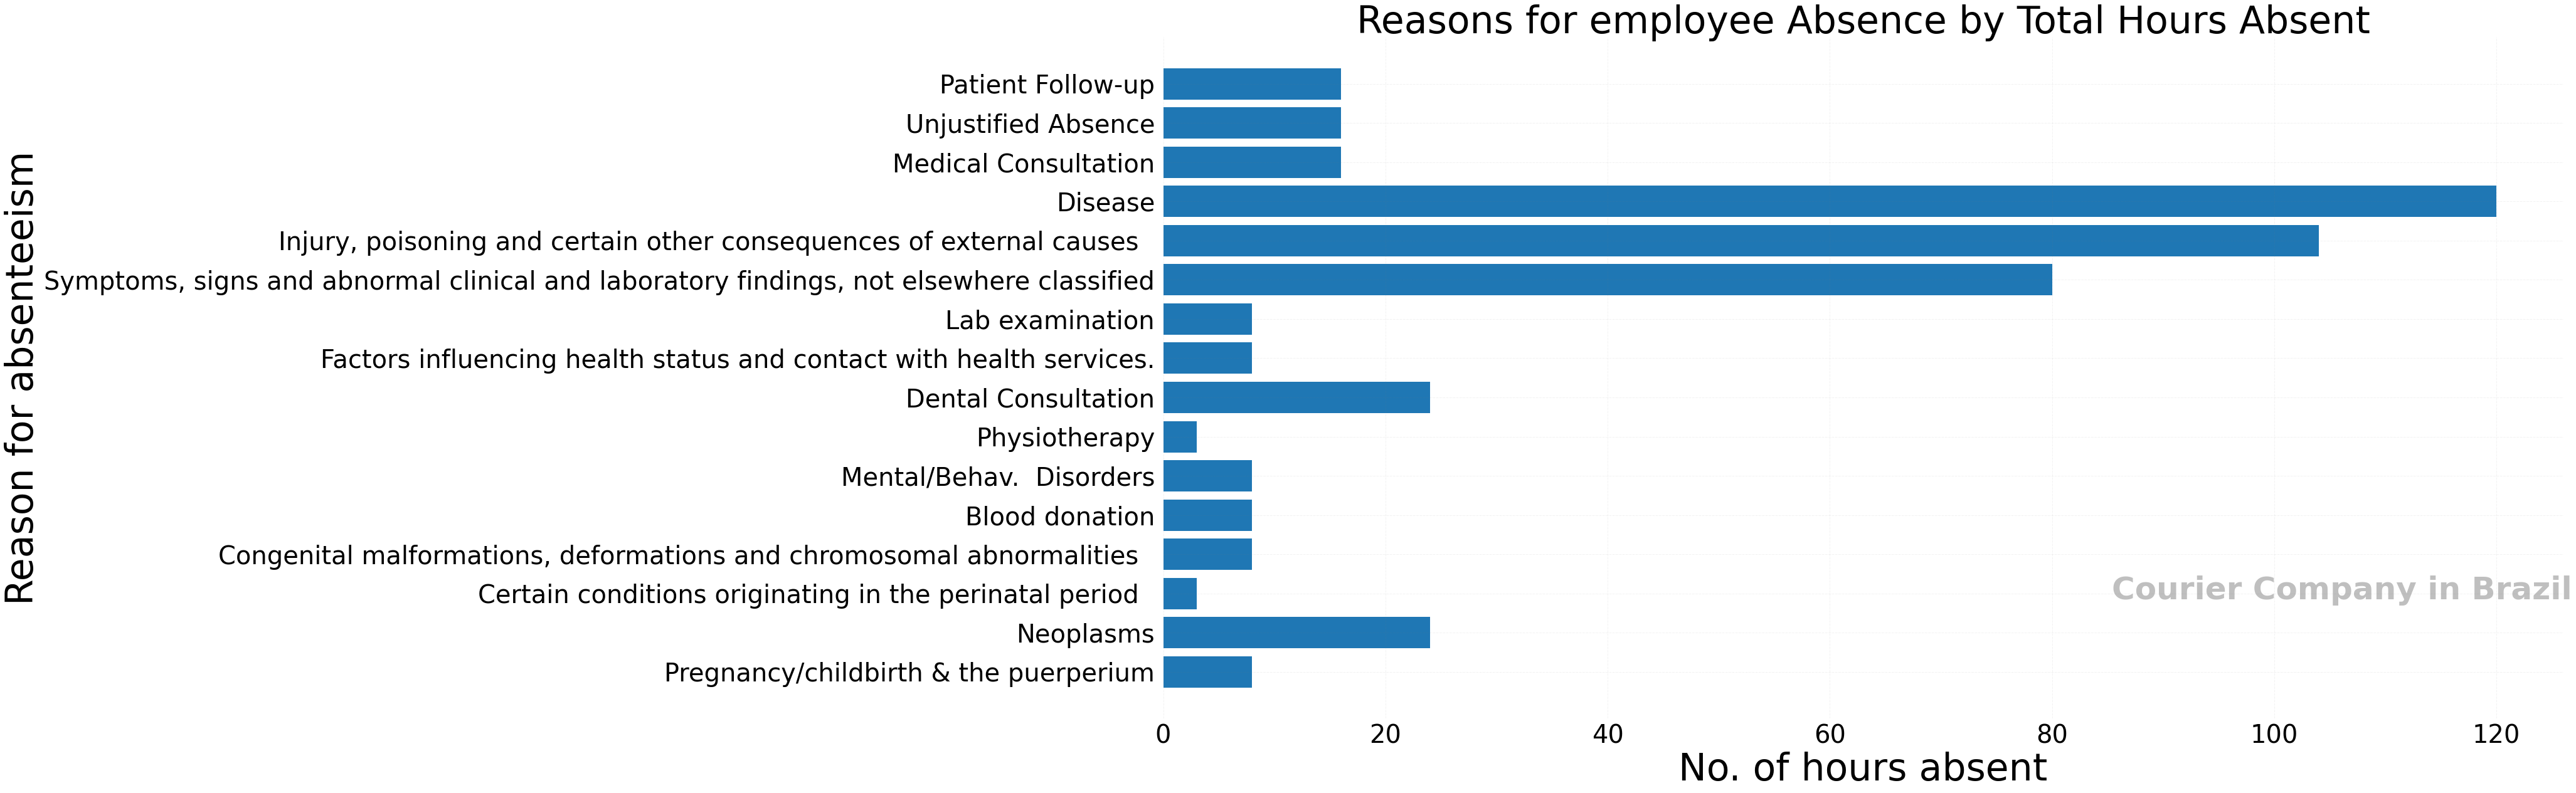

In [12]:
df = pd.DataFrame(data)
x = df["Reason"]
y = df["AT"]

# update default fontsize
plt.rcParams.update({"font.size": 40})

# plot graph by calling function
plot_barh(x, y)
    
# add plot title
plt.title("Reasons for employee Absence by Total Hours Absent", fontsize = 60)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("No. of hours absent", fontsize = 60)

         
#show plot
plt.show()
plt.close()
    

> The vertical bar chart above breaks down the absenteeism time in hours by the reason for the absence. We see that employees missed a total of 120 hours due to disease, followed by Injury, poisoing and certain other consequences of external causes. Physiotherapy and certain conditions originating in teh perinatal period had the least number of absences. 

In [13]:
# number of occurence for each Reason that resulted in employee absence
data["Reason"].value_counts()


Disease                                                                                    184
Medical Consultation                                                                       149
Dental Consultation                                                                        112
Unjustified Absence                                                                         74
Physiotherapy                                                                               69
Injury, poisoning and certain other consequences of external causes                         40
Patient Follow-up                                                                           38
Lab examination                                                                             31
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified     21
Factors influencing health status and contact with health services.                          6
Blood donation                                    

> We see from the table that Disease, Medical and Dental consultations were the most frequently used Reason for absence. Let's plot this on a vertical bar chart.

Text(0.5, 0, 'No. of hours absent')

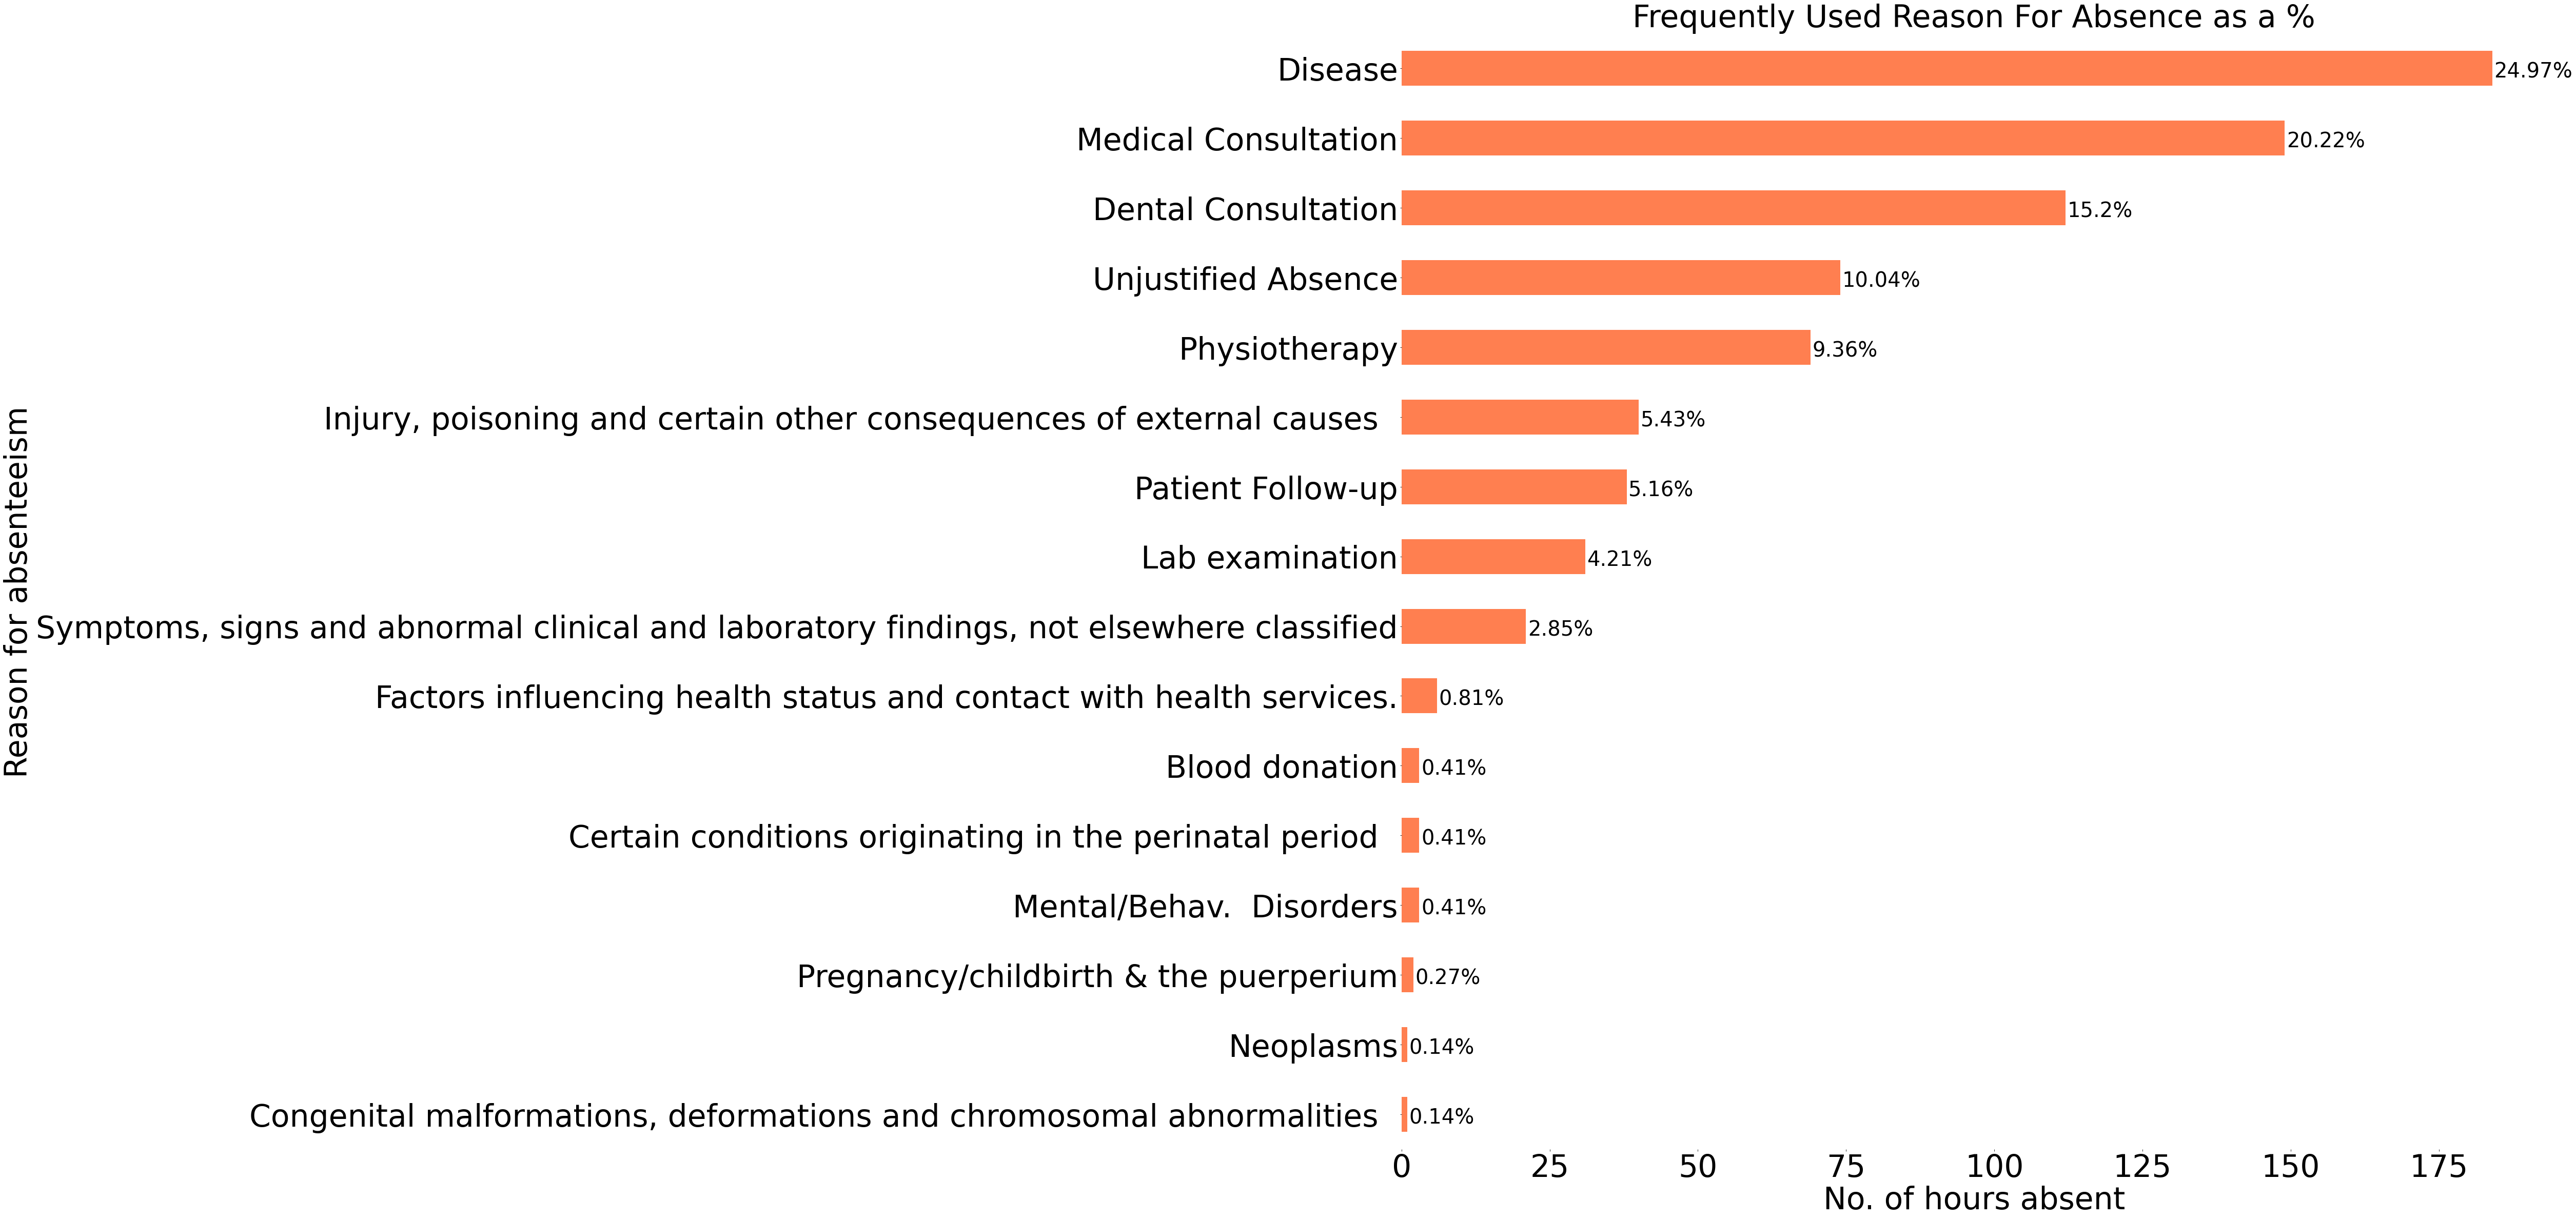

In [14]:
# now, let's plot the number of occurence of Reasons 

#plt.rcParams.update({"font.size": 60})
ax = data["Reason"].value_counts().plot(kind="barh", figsize =(40, 40), color="coral", fontsize = 60)
ax.set_alpha(0.2)

#add title
ax.set_title("Frequently Used Reason For Absence as a %", fontsize = 60)

# create a list to collect the plt.patches data
totals =[]

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    
# set individual bar labels using the above list    
    total = sum(totals)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, i.get_y() + 0.38, 
            str(round((i.get_width()/total) * 100, 2)) + "%", 
            fontsize= 40, color="black")
    
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)

#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("No. of hours absent", fontsize = 60)


Text(0.5, 0, 'No. of hours absent')

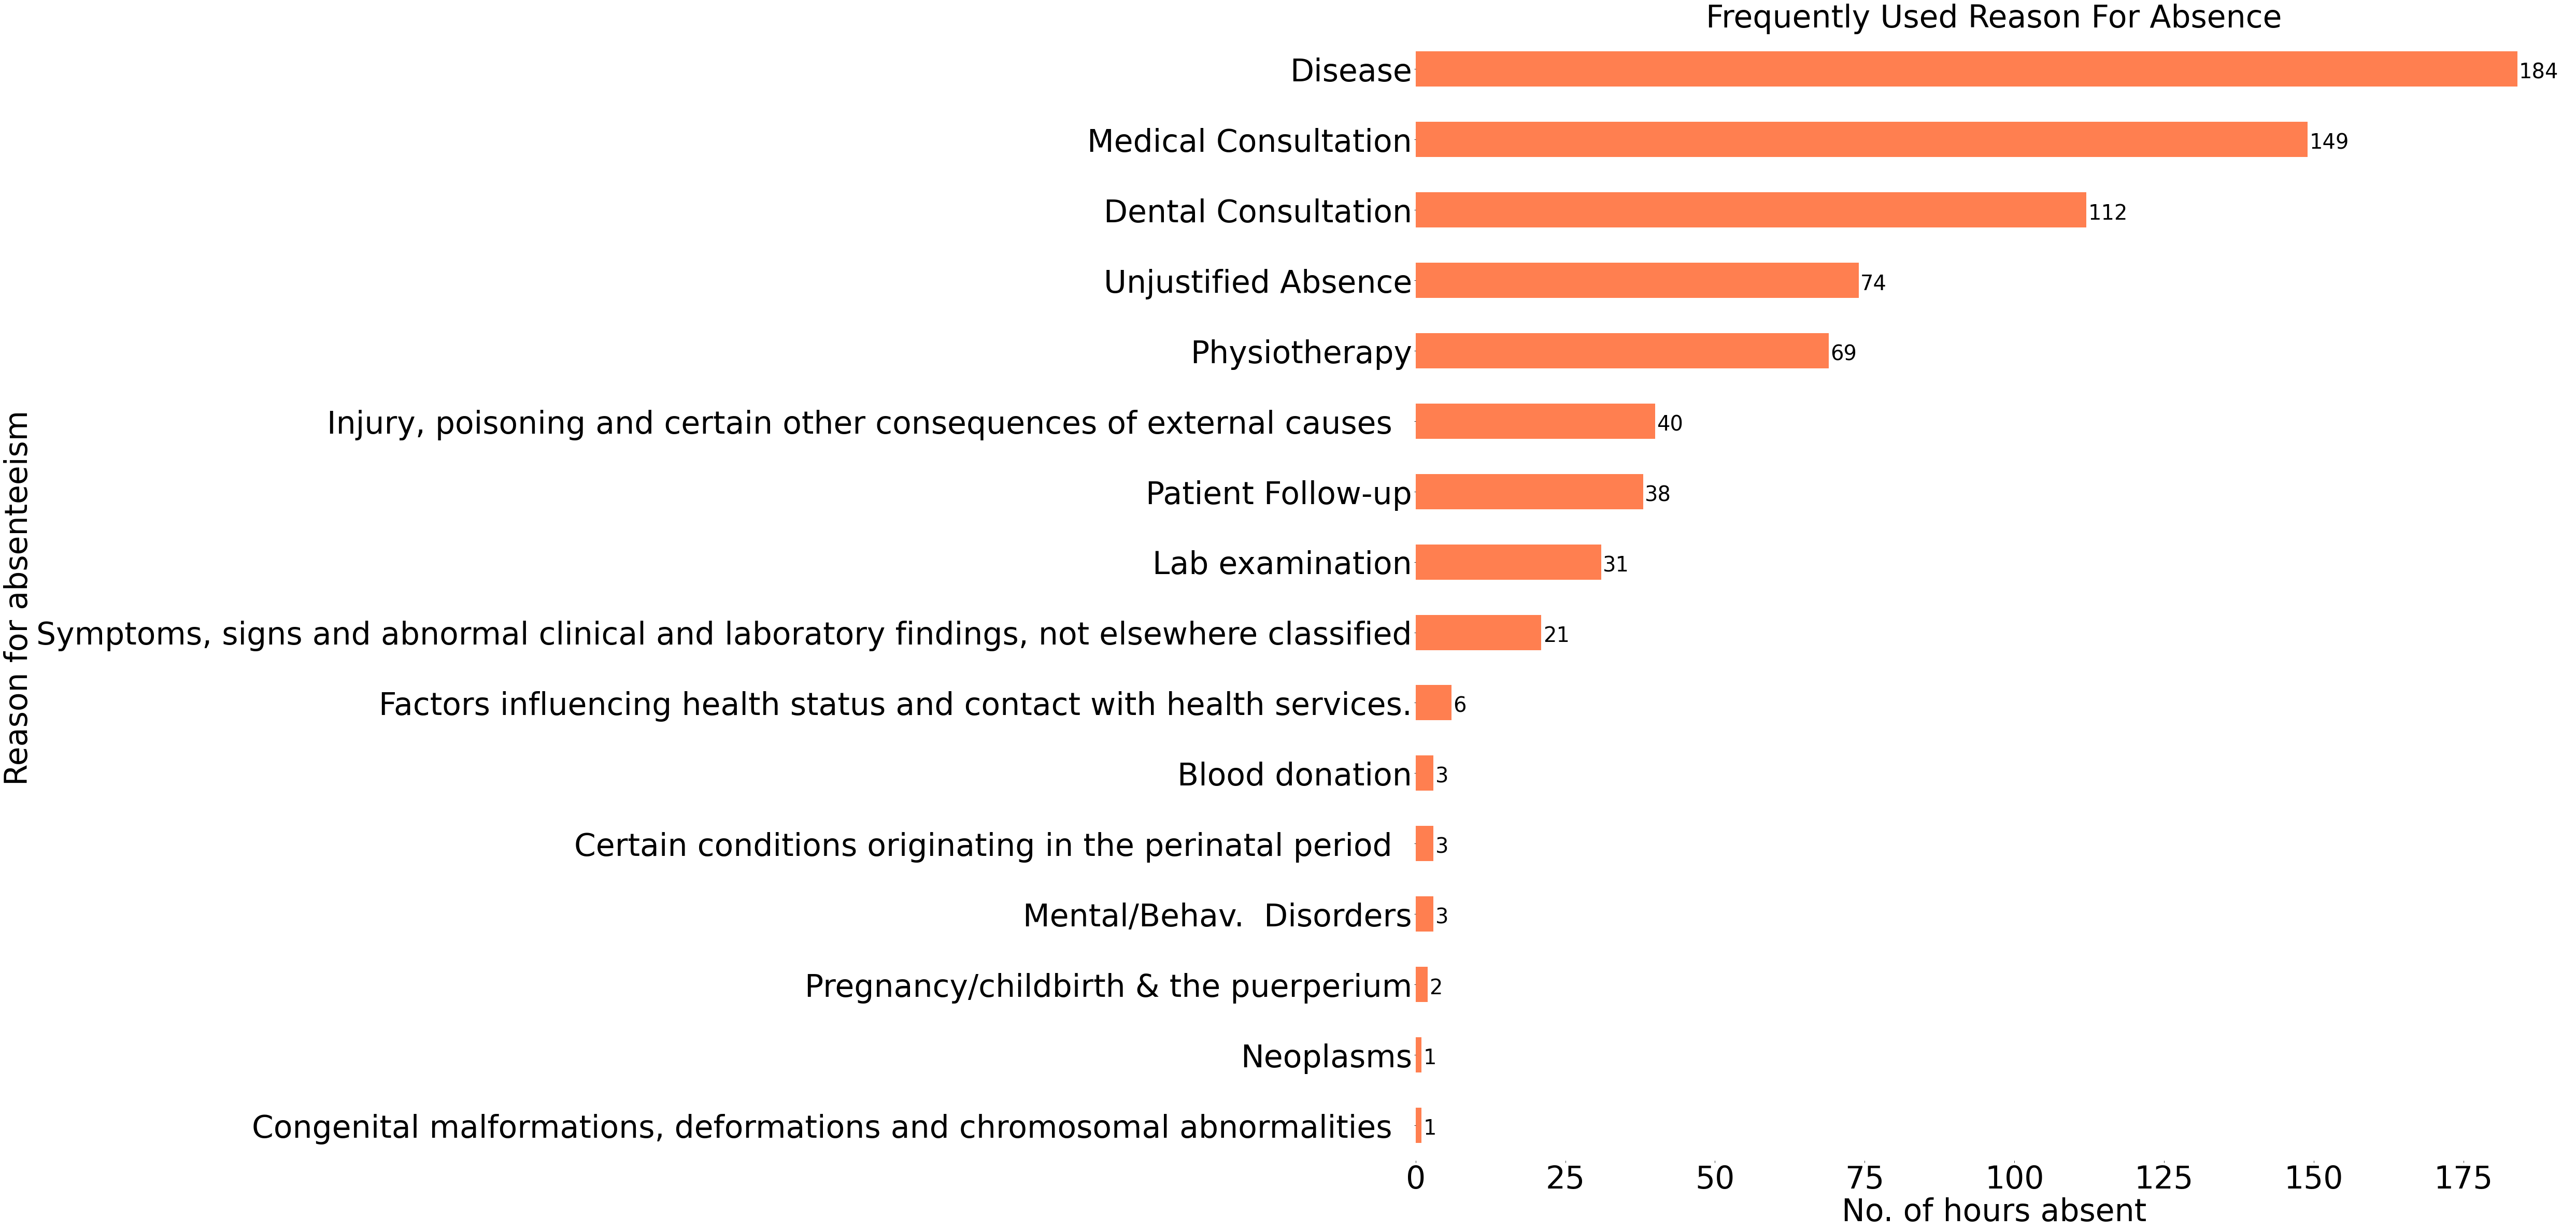

In [48]:
# Instead of percentages, let's plot the actual frequency of Reason for absence. 

ax = data["Reason"].value_counts().plot(kind="barh", figsize =(40, 40), color="coral", fontsize = 60)
ax.set_alpha(0.2)

#add title
ax.set_title("Frequently Used Reason For Absence", fontsize = 60)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, 
            i.get_y() + 0.38, 
            str(round((i.get_width()), 2)), 
                fontsize= 40, color="black")
            
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)
    
#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("No. of hours absent", fontsize = 60)

> Disease, Medical and Dental consulations were the most frequently used Reason for absence. However, Medical and Dental consultations didn't yield much hours of absence. A possible reason for this is that employees came back to work after a medical or dentail consulation. On the other hand, Disease had the most total hours of absenteeism most likely because employees can't return to work if they have a disease. So, they are likely to take longer hours off. Unjustified absence is also a relatively frequent reason for absence. The HR department would need to take a closer look into why employees have frequent unjustified absences. Later on, we'll deep deeper in this data using a few linear regression models.

In [2]:
#regression.py  
import pandas as pd
import copy
#from stats import *
import numpy as np
from scipy.stats import t, f

class Regression:
    def __init__(self):
        self.stats = stats()
        self.reg_history = {}
        
# if constant equal true, add a constant or column of ones to estimate  a constant      
    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0, 
            max_val = None, constant = True):
    
# create a variable which we can call later    
        self.min_val = min_val
        if max_val != None:
            self.max_val = max_val
        else:
            self.max_val = len(data)
        self.reg_name = reg_name
        self.y_name = y_name
        
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()
        if constant:
            self.add_constant()
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
        
        
    def save_output(self):
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),
                                           "Estimates": self.estimates.copy(),
                                           "Cov Matrix": self.cov_matrix.copy(),
                                           "Data": self.data.copy()}

        
    def calculate_regression_stats(self):
        self.sum_square_stats()
        self.calculate_degrees_of_freedom()
        self.calculate_estimator_variance()
        self.calculate_covariance_matrix()
        self.calculate_t_p_error_stats()  
        self.calculate_root_MSE()  
        self.calculate_rsquared()  
        self.calculate_fstat()  
        self.build_stats_DF()
        
        
    def sum_square_stats (self):
        ssr_list = []
        sse_list = []
        sst_list = []
        mean_y = self.stats.mean(self.y).item()
        for i in range(len(self.y)):
            # ssr is sum of squared distances between the estimates
            # and the average of y values (y-bar)
            # ssr is sum of squared residual
            # sse is sum of squared error
            # sst is sum of squared totals
            y_hat_i = self.y_hat[i]
            y_i = self.y[i]
            r = y_hat_i - mean_y
            e = y_i - y_hat_i
            t = y_i - mean_y
            ssr_list.append((r) ** 2)
            sse_list.append((e) ** 2)
            sst_list.append((t) ** 2)            
        # since ssr, sse, sst use values from the matrices, select the value within the
        # resultant matrix using matrix.item(0)
        # so, call value within the matrix instead of entire matrix itself
        
        self.ssr = self.stats.total(ssr_list).item(0)
        self.sse = self.stats.total(sse_list).item(0)
        self.sst = self.stats.total(sst_list).item(0)
        
        
    def calculate_degrees_of_freedom(self):
        
# Degrees of freedom compares the number of observations to the number  
# of exogenous variables used to form the prediction  
# we do this by substracting the # of exogenous vars from the observation
        self.lost_degrees_of_freedom = len(self.estimates) 
# the above line of code to calc the degrees of freedom can also be written as:        
        #self.lost_degrees_of_freedom = len(self.beta_names)
        
        self.num_obs = self.max_val + 1 - self.min_val  
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom
        
        
    def calculate_estimator_variance(self):
        
# estimator variance is the sse normalized by the degrees of freedom  
# thus, estimator variance increases as the number of exogenous  
# variables used in estimation increases(i.e., as degrees of freedom fall)  
        self.estimator_variance = self.sse / self.degrees_of_freedom
        
         
    def calculate_covariance_matrix(self):
                
# Covariance matrix will be used to estimate standard errors for each coefficient.  
# estimator variance * (X'X)**-1  
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
        self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                       columns = self.beta_names, 
                                       index = self.beta_names)    
        
            
    def add_constant(self):
        self.data["Constant"] = 1
        self.beta_names.append("Constant")
        
    
    def estimate_betas_and_yhat(self):
        #X betas = (X'X)**-1 *X'Y
        # beta values help us predict the y values
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)  
        # y-hat = X * betas  
        self.y_hat = np.matmul(self.X, self.betas)  
         # Create a column that holds y-hat values
        self.data[self.y_name[0] + "estimator"] = [i.item(0) for i in self.y_hat]
        # create a table that holds the estimated coefficients  
        # this will also be used to store SEs, t-stats,and p-values
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names, columns = ["Coefficient"])
        # identify y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]
        
        
    def build_matrices(self):
        # Transform df to matrices
        # Let's start with the y-matrix
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a K X n nested list containing vectors from each exogenous veriable
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1  
        X_transp_X = np.matmul(self.X_transpose, self.X)  
        self.X_transp_X_inv = X_transp_X.getI()  
        # X'y  
        self.X_transp_y = np.matmul(self.X_transpose, self.y)
        
        
        
    def calculate_t_p_error_stats(self):        
        results = self.estimates  
        
        # then we'll create a table that holds the standard error, t-stat and p-value
        stat_sig_names = ["SE", "t-stat", "p-value"]  
        
        # create space or a few blank columns in data frame for SE, t, and p  
        for stat_name in stat_sig_names:  
            results[stat_name] = np.nan  
            
        # cycle through the list of variables and calc the stats for each variable  
        for var in self.beta_names: 
            
            # SE ** 2 of coefficient is found in the diagonal of cov_matrix  
            results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)  

            # t-stat = Coef / SE  
            results.loc[var]["t-stat"] = results["Coefficient"][var] / results["SE"][var]  
                
            # p-values is estimated using a table that transforms t-value in light of degrees of freedom 
            # we multiplied by 2 for a 2-tailed test
            # we'll round the results to 5 decimal places
            results.loc[var]["p-value"] = np.round(t.sf(np.abs(results.loc[var]["t-stat"]),\
                                                        self.degrees_of_freedom + 1) * 2, 5)
                
        # create ratings for statistical significance according to p-values, 0.05, 0.01, 0.001
        ratings = [.05, .01, .001] 
                
        # values for significances will be blank unless p-values < .05  
        # pandas does not allow np.nan values or default blank strings to be replaced   
        # significance = ["" for i in range(len(self.beta_names))] 
        # the above code can also be simplified as:
        significance = ["" for name in self.beta_names]
        for i in range(len(self.beta_names)):  
            var = self.beta_names[i]  
            for rating in ratings:  
                if results.loc[var]["p-value"] < rating: 
                    
                    # For each rating, compare the P-Value to the rating add a "*" for each level that the P-value is lower 
                    # so, if it's below 0.5, add *, if it's below 0.1, add another *, if it's below 0.001, add yet another *
                    significance[i] = significance[i]  + "*"  
        results["signficance"] = significance
        
        
        
# calculating root MSE, r-squared and F-stat        
    def calculate_root_MSE(self):  
        self.root_mse = self.estimator_variance ** (1/2)  

    def calculate_rsquared(self):  
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
                                                                  / (self.num_obs - 1)) 
        

    def calculate_fstat(self):  
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                                               - 1) / self.estimator_variance  
            
# buiding a dictionary with all the stats (f-stats, SSE, MSE, etc)  then we'll create a df out of it.            
    def build_stats_DF(self):
        # create dictionary of stats
        stats_dict = {"r**2":[self.r_sq],
                      "adj r**2":[self.adj_r_sq],
                      "f-stat":[self.f_stat],
                      "Est Var":[self.estimator_variance],  
                      "rootMSE":[self.root_mse],  
                      "SSE":[self.sse],  
                      "SSR":[self.ssr],   
                      "SST":[self.sst],  
                      "Obs.":[int(self.num_obs)],   
                      "DOF":[int(self.degrees_of_freedom)]} 
        
        # make df for the stats dict
        self.stats_DF = pd.DataFrame(stats_dict)
        
        # create a name for the df
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        
        # transpose df
        self.stats_DF = self.stats_DF.T
        
        
        
    def joint_f_test(self, reg1_name, reg2_name):  
    # identify data for each regression  
        reg1 = self.reg_history[reg1_name]  
        reg2 = self.reg_history[reg2_name]  
    # identify beta estimates for each regression to draw variables  
        reg1_estimates = reg1["Estimates"]          
        reg2_estimates = reg2["Estimates"]  
    # name of y_var is saved as estimates index name  
        reg1_y_name = reg1_estimates.index.name  
        reg2_y_name = reg2_estimates.index.name  
        num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
        num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
    # check that the f-stat is measuring restriction, not for diff data sets
        if num_obs1 != num_obs2:   
            self.joint_f_error()  
        if reg1_y_name == reg2_y_name:          
            restr_reg = reg1 if \
                len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
            unrestr_reg = reg2 if restr_reg is reg1 else reg1  
            restr_var_names = restr_reg["Estimates"].index  
            unrestr_var_names = unrestr_reg["Estimates"].index  
    # identify statistics for each regression  
        restr_reg = restr_reg if False not in \
                [key in unrestr_var_names for key in restr_var_names] else None
        if restr_reg == None:  
            self.joint_f_error()  
        else:  
            sser = restr_reg["Reg Stats"].loc["SSE"][0]  
            sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
            dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
            dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
            dfn = dofr - dofu  
            dfd = dofu - 1  
            f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
            f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
    # make dictionary  
            f_test_label = ""  
            for key in unrestr_var_names:  
                if key not in restr_var_names:  
                     f_test_label = f_test_label + str(key) + " != "  
            f_test_label = f_test_label + "0"  
            res_dict = {"f-stat":[f_stat],  
                        "p-value":[f_crit_val],  
                        "dfn":[dfn],  
                        "dfd":[dfd]}  
            res_DF = pd.DataFrame(res_dict)  
            res_DF = res_DF.rename(index={0:""})  
            res_DF = res_DF.T  
            res_DF.index.name = f_test_label  

        return res_DF  

def joint_f_error(self):  
        print("Regressions not comparable for joint F-test")  
        return None
        

In [59]:
# Load libraries
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
# Import train_test_split function
from sklearn.model_selection import train_test_split 
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
from sklearn import linear_model

# y = data[["AT"]]
# X = data[["ST", "Reason_C"]]
# lm = linear_model.LinearRegression()
# model = lm.fit(X,y)

# predictions = lm.predict(X)
# predictions[0:5]


feature_cols = ["ST", "Reason_C"]
X = data[feature_cols]
y = data["AT"]

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(515, 2) (515,)
(222, 2) (222,)


In [60]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[:5]

array([3.38759016, 8.2578215 , 7.52538116, 7.43382612, 6.97605091])

In [63]:
#print “Score:”, 
model.score(X_test, y_test)

-0.016479359745237065